 # Customer Cars Catogry 
 
 Customer Segmentation in an Automobile Company In this dataset we will try to classify.
 they’ve deduced that the behavior of the new market is similar to their existing market. In their existing market,   the sales team has classified all customers into 4 segments (A, B, C, D ).

# Load and Librarys

In [14]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
#from multiscorer import MultiScorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
#encode
from sklearn.preprocessing import LabelEncoder
#import xgboost as xgb
import time 

In [15]:
# Loading the data
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [16]:
df= train

In [17]:
df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# Data Cleaing

In [18]:
df.shape

(8068, 11)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [20]:
df[df['Family_Size'].isna()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
12,461230,Female,No,19,No,Executive,0.0,Low,NaN,Cat_3,D
33,467010,Male,No,26,No,Homemaker,9.0,Low,NaN,Cat_6,D
59,460881,Male,Yes,72,Yes,Lawyer,1.0,Low,NaN,Cat_4,D
112,467758,Female,Yes,50,Yes,Doctor,1.0,Low,NaN,Cat_6,B
126,466295,Female,Yes,42,No,Engineer,0.0,Low,NaN,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
7937,460019,Female,No,46,Yes,Doctor,6.0,Low,NaN,Cat_6,C
7992,467574,Male,No,32,Yes,Healthcare,4.0,Low,NaN,Cat_2,D
8017,461758,Male,No,33,Yes,Healthcare,8.0,Low,NaN,Cat_3,D
8024,467153,Female,Yes,51,Yes,Artist,0.0,Low,NaN,Cat_6,A


In [21]:
df['Family_Size'].median()

3.0

In [22]:
df['Family_Size'].mean()

2.85012285012285

In [23]:
x=df['Family_Size'].median()

In [24]:
df['Family_Size'].fillna(x, inplace=True)

In [25]:
df['Family_Size']=df['Family_Size'].astype("int" )

In [26]:
test.shape

(2627, 11)

In [27]:
df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1,Cat_6,B


In [28]:
# Value Checking
for col in df.columns:
  print('Values pada kolom {}:'.format(col))
  print(df[col].unique())
  print()

Values pada kolom ID:
[462809 462643 466315 ... 465406 467299 461879]

Values pada kolom Gender:
['Male' 'Female']

Values pada kolom Ever_Married:
['No' 'Yes' nan]

Values pada kolom Age:
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]

Values pada kolom Graduated:
['No' 'Yes' nan]

Values pada kolom Profession:
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

Values pada kolom Work_Experience:
[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]

Values pada kolom Spending_Score:
['Low' 'Average' 'High']

Values pada kolom Family_Size:
[4 3 1 2 6 5 8 7 9]

Values pada kolom Var_1:
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']

Values pada kolom Segmentation:
['D' 'A' 'B' 'C']



In [29]:
df['Ever_Married'].mode()

0    Yes
dtype: object

In [30]:
df['Ever_Married'].fillna(df['Ever_Married'].mode()[0],inplace=True)

In [31]:
df['Graduated'].mode()

0    Yes
dtype: object

In [32]:
df['Graduated'].fillna(df['Graduated'].mode()[0],inplace=True)

In [20]:
print("The Skewness is %.2f" %df['Work_Experience'].skew() )
print("The Mean is %.2f" %df['Work_Experience'].mean() )
print("The Median is %.2f" %df['Work_Experience'].median() )
print("The Mode is %.2f" %df['Work_Experience'].mode() )

The Skewness is 1.31
The Mean is 2.64
The Median is 1.00
The Mode is 1.00


In [21]:
work_0 = df[df['Work_Experience'] == 0]
work_1 = df[df['Work_Experience'] == 1]

ratio_0y = round(work_0.shape[0] / (work_0.shape[0] + work_1.shape[0]), 3)
ratio_1y = round(work_1.shape[0] / (work_0.shape[0] + work_1.shape[0]), 3)

print("Work 0 year ratio: ", ratio_0y)
print("Work 1 year ratio: ", ratio_1y)

Work 0 year ratio:  0.496
Work 1 year ratio:  0.504


In [22]:
option = [0, 1]

df['Work_Experience'] = df['Work_Experience'].apply(lambda x: np.random.choice(option, p=[ratio_0y, ratio_1y]) \
                                                    if pd.isnull(x) else x)

In [23]:
df['Profession'].mode()

0    Artist
dtype: object

In [24]:
df['Profession'].fillna(df['Profession'].mode()[0],inplace=True)

In [25]:
df['Var_1'].fillna(df['Var_1'].mode()[0], inplace=True)

D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: Segmentation, dtype: float64


<AxesSubplot:>

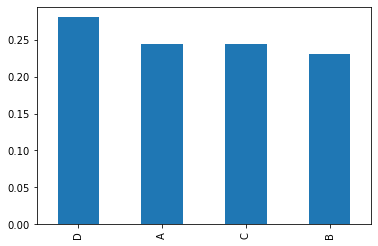

In [26]:
target_show = df['Segmentation'].value_counts(normalize=True)  
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

Show The Traget is imblnce or Blance so it is Imblance 

#### Final Checking

In [27]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

# EDA

In [28]:
# Membedakan data categorical dan numeric
num_dtypes=['int64']
cat_dtypes=['object']

num_df = df.select_dtypes(include = num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numericals = num_df.columns
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['ID', 'Age'], dtype='object')
Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')


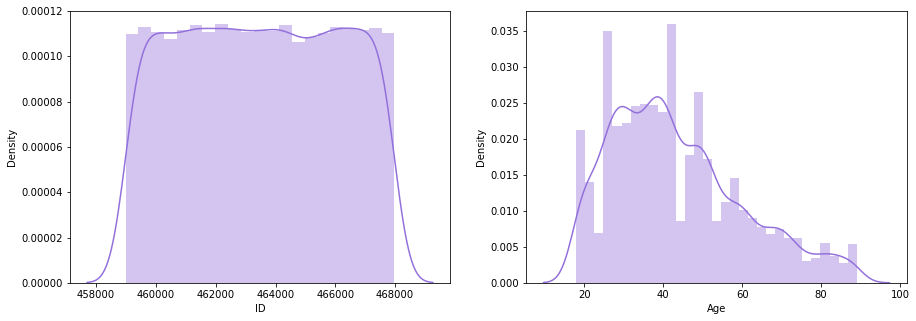

In [29]:
plt.figure(figsize=(15, 5))

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.distplot(df[numericals[i]], color='mediumpurple')

In [30]:
df[categoricals].describe()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,8068,8068,8068,8068,8068,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4783,5046,2640,4878,5314,2268


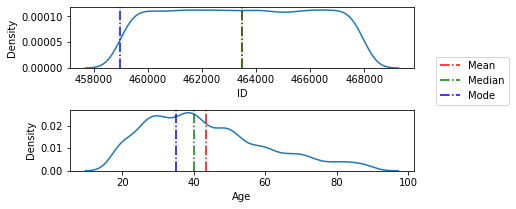

In [31]:
for i in range(0, len(numericals)):
    plt.subplot(3, len(numericals)/2, i+1)
    mean=df[numericals[i]].mean()
    median=df[numericals[i]].median()
    mode=df[numericals[i]].mode().values[0]
    sns.distplot(df[numericals[i]],hist=False)
    plt.axvline(mean, color='r', linestyle='-.', label="Mean")
    plt.axvline(median, color='g', linestyle='-.', label="Median")
    plt.axvline(mode, color='b', linestyle='-.', label="Mode")
    plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1),loc='lower left')
plt.show()

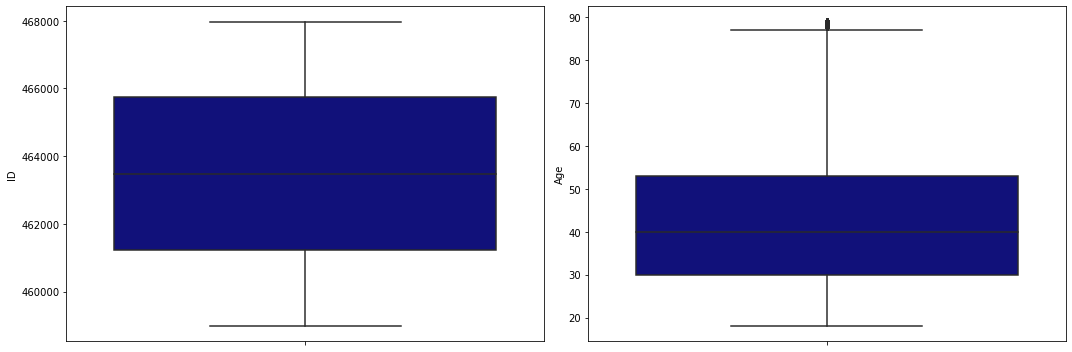

In [32]:
plt.figure(figsize=(15, 5))
for col in range(0, len(numericals)):
    plt.subplot(1, len(numericals), col+1)
    sns.boxplot(y=df[numericals[col]], color='darkblue', orient='v')
    plt.tight_layout()

From the distribution plot above, it can be seen that the three numerical data are positively skewed. Family_Size data has a mean < median .

Univariate Analysis

### Multivariate Analysis

<AxesSubplot:>

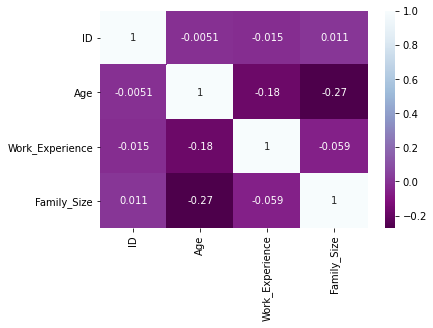

In [33]:
sns.heatmap(df.corr(),cmap="BuPu_r",annot=True) 

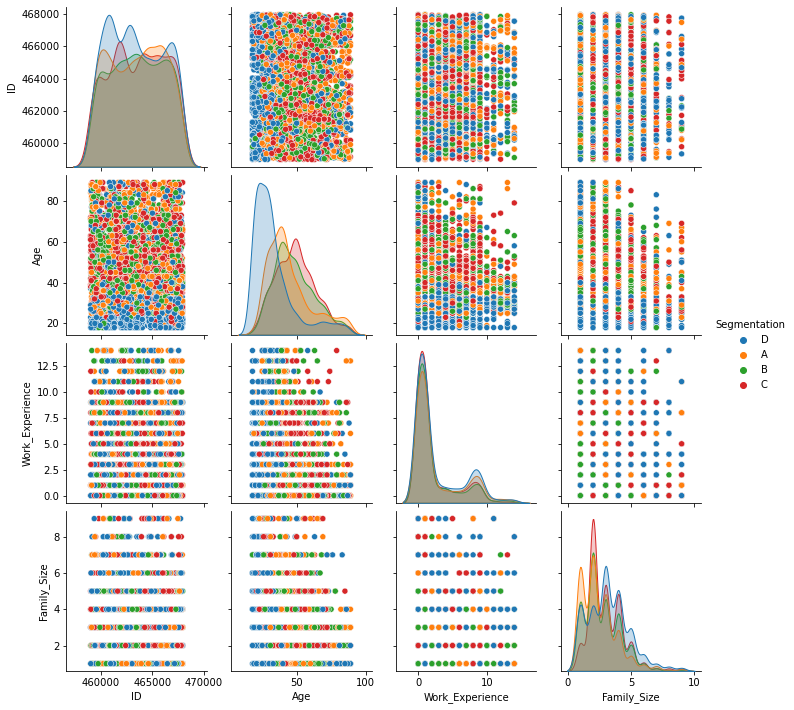

In [34]:
plt.figsize=((10,10))
sns.pairplot(df, diag_kind='kde',hue='Segmentation')
warnings.filterwarnings("ignore")

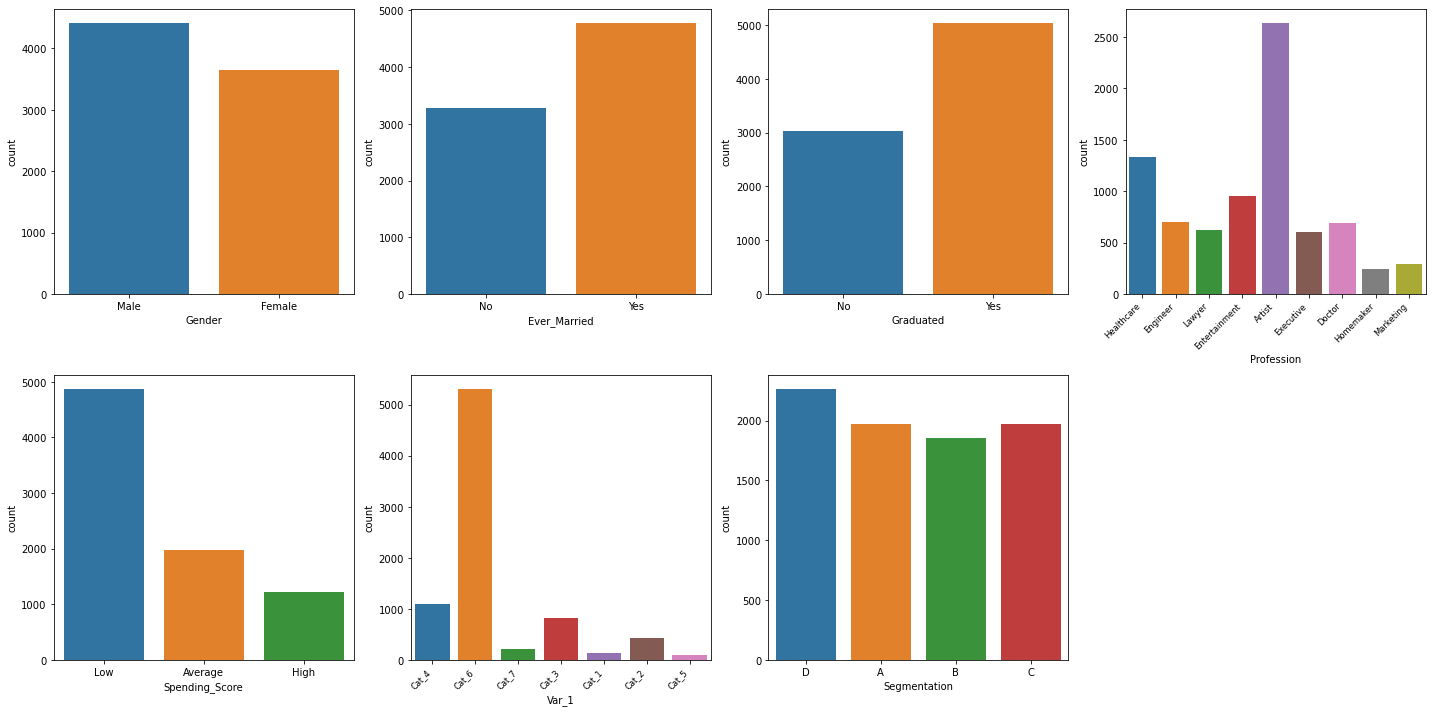

In [35]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)):
    plt.subplot(2, round(len(categoricals)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(df[categoricals[i]], orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(df[categoricals[i]], orient='v')
    plt.tight_layout()

#### With Target

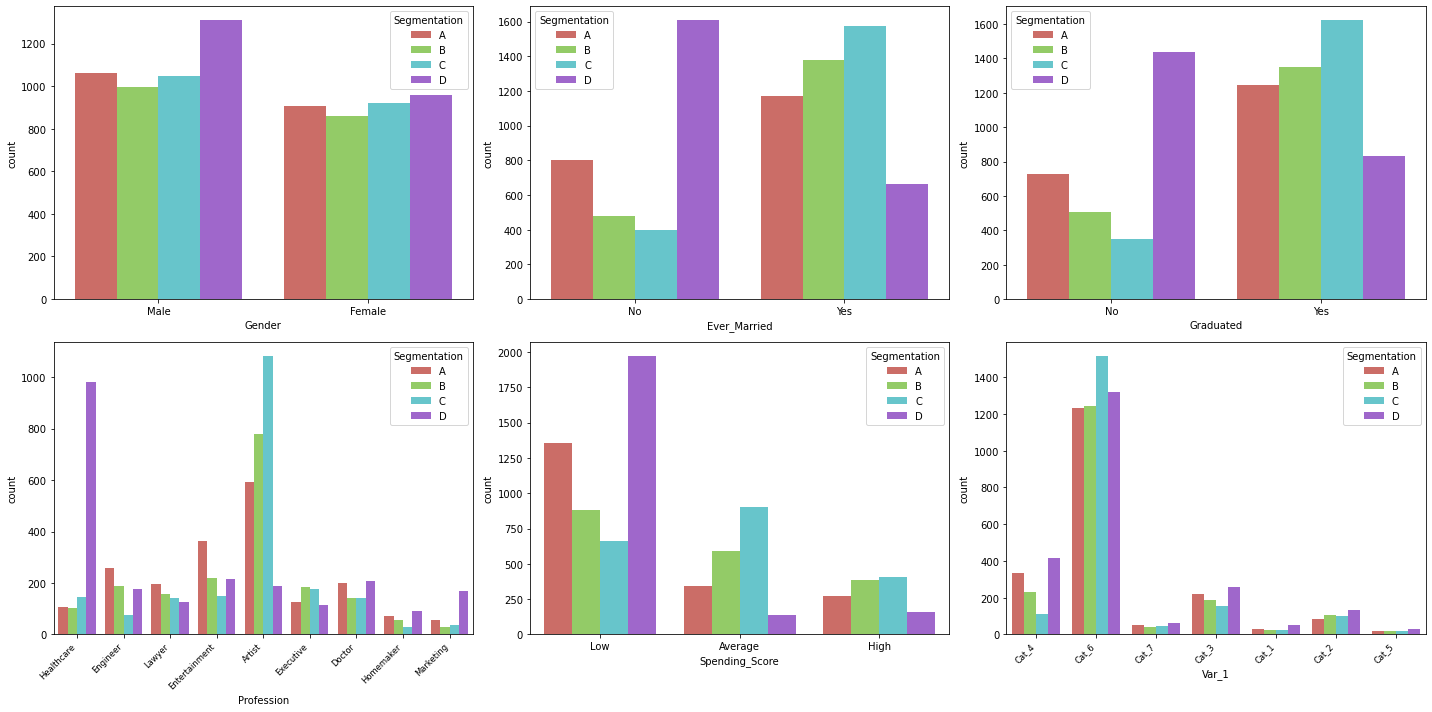

In [36]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)-1):
    plt.subplot(2, round((len(categoricals)-1)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(x=categoricals[i],hue='Segmentation', hue_order=['A', 'B', 'C', 'D'], data=df[categoricals], palette='hls', orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(x=categoricals[i],hue='Segmentation', hue_order=['A', 'B', 'C', 'D'], data=df[categoricals], palette='hls', orient='v')
    plt.tight_layout()

Insights:

<ul>
 <li> Most Gender Male in segment D, Female C & D </li>
  <li> There are many married customers in segment C, many unmarried customers in segment D </li>
    <li> Many customers who have graduated are in segment C, not many are in segment D </li>
    <li> Most healthcare professions are in segment D, artists are in group C</li>
    <li> Spending Score customers who are low mostly enter the D . segment</li>
    <li> Customers with category 6 (cat6) are mostly included in segment C</li>
</ul>

## Target Imbalance Checking

In [37]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

# Feature Engineering

### Data Encoding


One-Hot Encoding

In [38]:
y_raw = df['Segmentation']
X_raw = df.drop('Segmentation', axis=1)


# Seperate the Numerical and Categorical Features
X_raw_num = pd.DataFrame()
X_raw_cat = pd.DataFrame()

for column in X_raw.columns:
    if X_raw[column].dtype == 'object':
        X_raw_cat[X_raw[column].name] = X_raw[column]
    else:
        X_raw_num[X_raw[column].name] = X_raw[column]

In [39]:
X_raw_num.head()

,ID,Age,Work_Experience,Family_Size
0,462809,22,1.0,4
1,462643,38,0.0,3
2,466315,67,1.0,1
3,461735,67,0.0,2
4,462669,40,0.0,6


In [40]:
for col in X_raw_cat:
  X_raw_cat = pd.get_dummies(X_raw_cat, columns=[col], prefix=[col])

In [41]:
X_raw_cat.head(3)

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [42]:
numerical_features = [col for col in df.columns if df[col].dtypes!='O']

In [43]:
numerical_features

['ID', 'Age', 'Work_Experience', 'Family_Size']

In [44]:
categorical_features = [col for col in df.columns if df[col].dtypes=='O']

In [45]:
categorical_features

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

In [46]:
encoder = LabelEncoder()

In [47]:
df['Gender'] = encoder.fit_transform(df['Gender'])

df['Ever_Married'] = encoder.fit_transform(df['Ever_Married'])

df['Graduated'] = encoder.fit_transform(df['Graduated'])

df['Profession'] = encoder.fit_transform(df['Profession'])

df['Spending_Score'] = encoder.fit_transform(df['Spending_Score'])

df['Var_1'] = encoder.fit_transform(df['Var_1'])

In [1]:
df[categorical_features].head()

NameError: name 'df' is not defined

In [49]:
X = df.drop(columns=['Segmentation','ID','Gender'],axis=1)

In [50]:
Y = df['Segmentation']

In [51]:
Y = encoder.fit_transform(Y)

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [53]:
Y= np.array(Y)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [55]:
model = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=33)

In [56]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=33)

# Modeling

In [57]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print(name)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred, average='macro'))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred, average='macro'))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred, average='macro'))

In [58]:
models = []

models.append(("Random Forest", RandomForestClassifier(random_state = 10)))
models.append(("k-Nearest Neighbors", KNeighborsClassifier()))
models.append(("Decision Trees", DecisionTreeClassifier(random_state = 10)))
models.append(("Naive Bayes", GaussianNB()))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state = 10)))
models.append(("Logistic Regression", LogisticRegression(multi_class='ovr', max_iter=400, random_state = 10)))
models.append(("Support Vector Machine", SVC(decision_function_shape='ovo', random_state=10))) 

In [59]:
datas = []
datas.append(df)


datasetname = ['df', 'Test']

In [60]:
modelresult = pd.DataFrame()

# Create the Models

In [61]:
data_modres = []
model_modres = []
train_modres = []
test_modres = []
acc_modres = []
prec_modres = []
rec_modres = []
f1_modres = []

for dataset, dataname in zip(datas, datasetname):
    X = dataset.drop(['Segmentation'], axis=1) # feature
    y = dataset['Segmentation'] # target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

    for name, model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
    
        data_modres.append(dataname)
        model_modres.append(name)
        train_modres.append(str(round(model.score(X_train, y_train), 2)))
        test_modres.append(str(round(accuracy_score(y_test, pred), 2)))  
        prec_modres.append(str(round(precision_score(y_test, pred, average='macro'), 2)))
        rec_modres.append(str(round(recall_score(y_test, pred, average='macro'), 2)))
        f1_modres.append(str(round(f1_score(y_test, pred, average='macro'), 2)))

modelresult['Data'] = data_modres
modelresult['Model'] = model_modres
modelresult['Train Score Accuracy'] = train_modres
modelresult['Test Score Accuracy'] = test_modres
modelresult['Precision'] = prec_modres
modelresult['Recall'] = rec_modres
modelresult['F1 Score'] = f1_modres

warnings.simplefilter(action='ignore', category=FutureWarning)

In [62]:
modelresult.sort_values(by='Test Score Accuracy', ascending=False)


,Data,Model,Train Score Accuracy,Test Score Accuracy,Precision,Recall,F1 Score
4,df,Gradient Boosting,0.61,0.54,0.53,0.53,0.53
0,df,Random Forest,1.0,0.51,0.49,0.5,0.49
3,df,Naive Bayes,0.48,0.48,0.45,0.47,0.45
2,df,Decision Trees,1.0,0.44,0.43,0.43,0.43
1,df,k-Nearest Neighbors,0.62,0.41,0.42,0.41,0.41
5,df,Logistic Regression,0.34,0.36,0.18,0.33,0.23
6,df,Support Vector Machine,0.28,0.29,0.07,0.25,0.11


In [63]:
dfresult = modelresult.sort_values(by='Test Score Accuracy', ascending=False)
dfresult = dfresult[['Data', 'Model', 'Train Score Accuracy', 'Test Score Accuracy']]
dfresult['Data-Model'] = dfresult['Data'] + str('-') + dfresult['Model']
dfresult['Train Score'] = dfresult['Train Score Accuracy'].astype(float)
dfresult['Test Score'] = dfresult['Test Score Accuracy'].astype(float)

dfresult.drop(['Train Score Accuracy', 'Test Score Accuracy', 'Data', 'Model'], axis=1, inplace=True)

dfresult

,Data-Model,Train Score,Test Score
4,df-Gradient Boosting,0.61,0.54
0,df-Random Forest,1.00,0.51
3,df-Naive Bayes,0.48,0.48
2,df-Decision Trees,1.00,0.44
1,df-k-Nearest Neighbors,0.62,0.41
5,df-Logistic Regression,0.34,0.36
6,df-Support Vector Machine,0.28,0.29


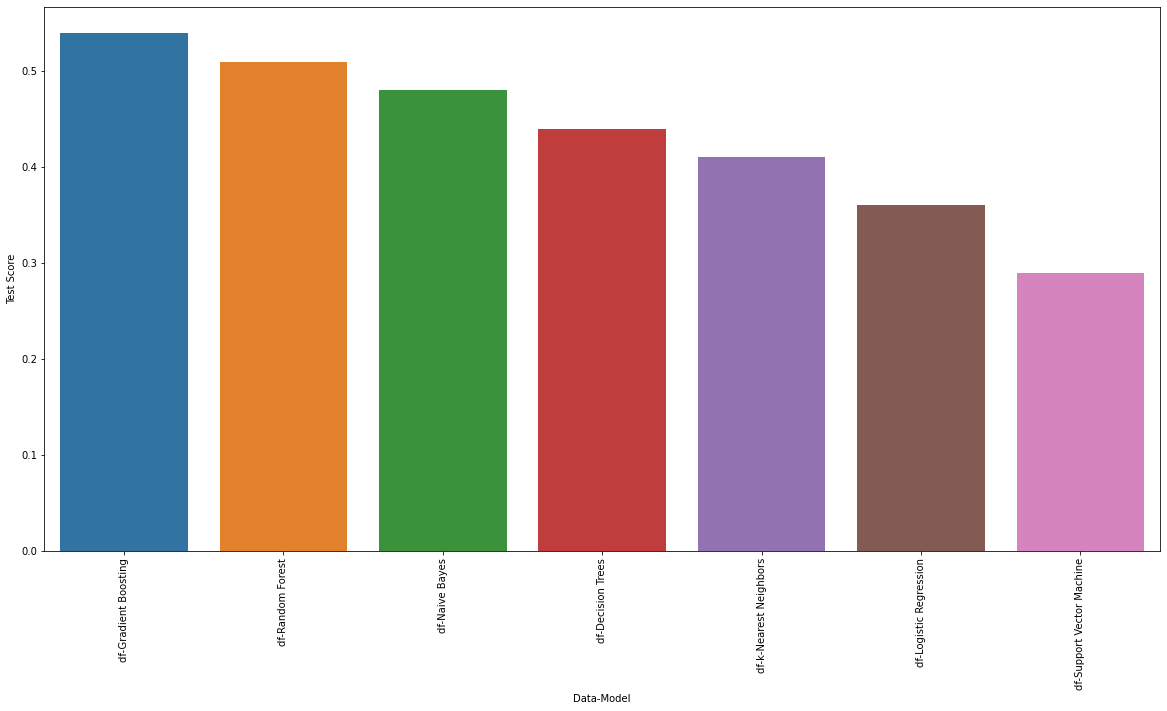

In [64]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Data-Model', y='Test Score', data=dfresult)
plt.xticks(rotation=90)
plt.show()

### Underfitting/Overfitting

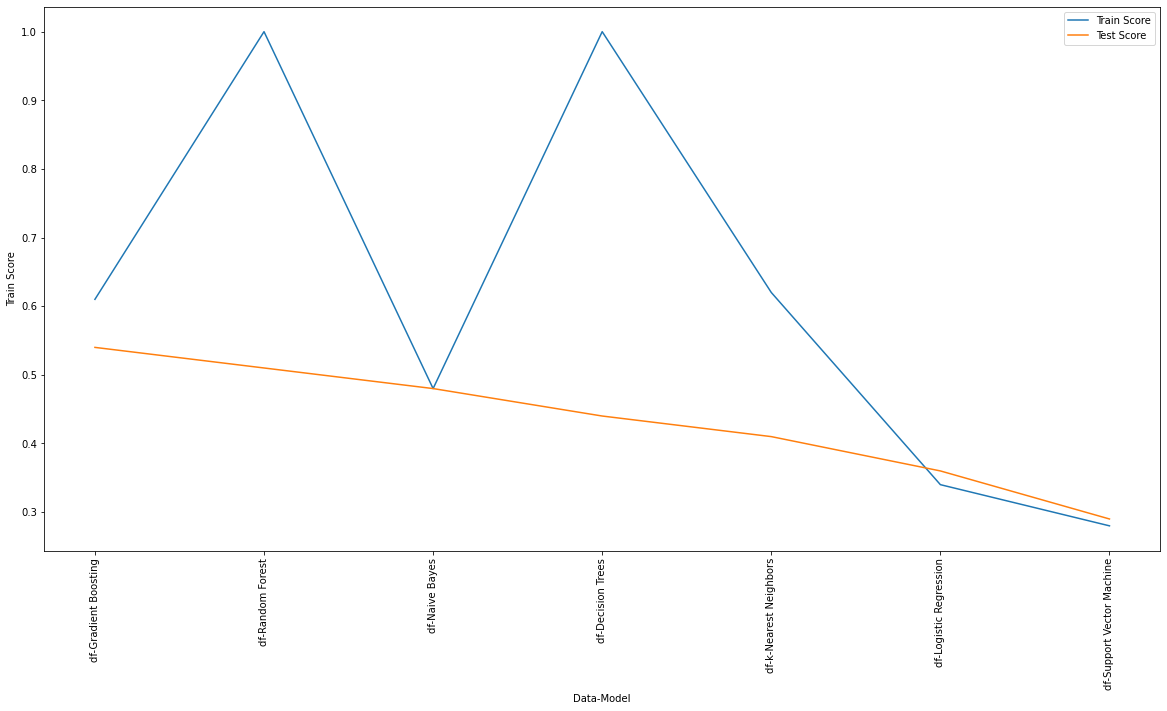

In [65]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Data-Model', y='Train Score', data=dfresult, label = 'Train Score')
sns.lineplot(x='Data-Model', y='Test Score', data=dfresult, label = 'Test Score')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Hyperparameter Tuning

In [67]:
X = df.drop(['Segmentation'], axis=1) # feature
y = df['Segmentation'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Narrow each parameter

Text(0, 0.5, 'Aku')

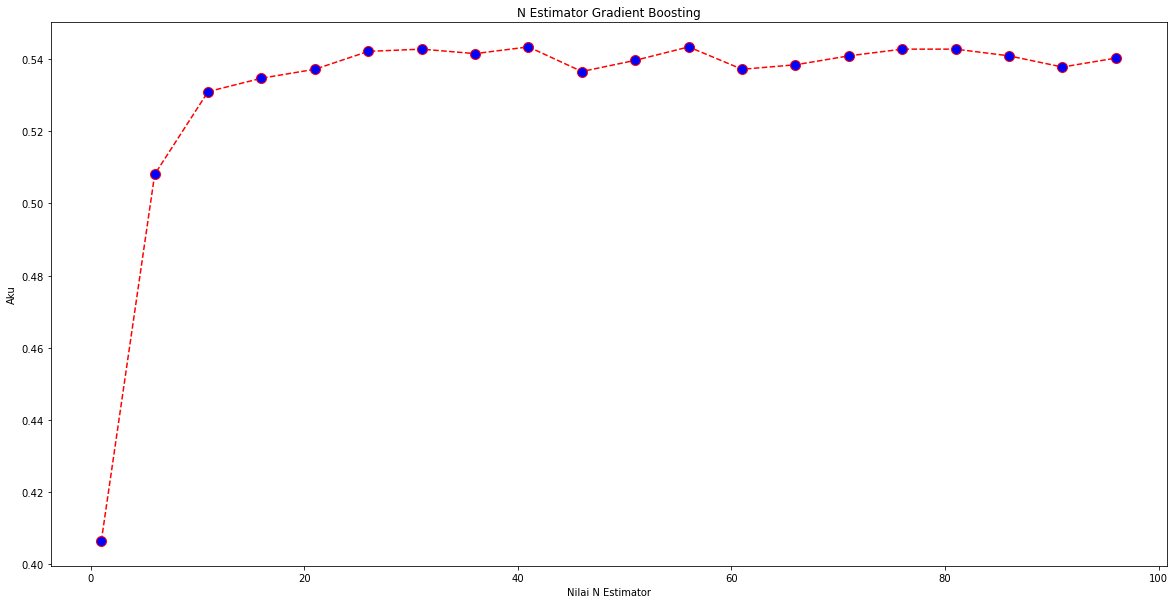

In [70]:
acc_nestimator = []

# Calculating accuracy for n_estimator 
for i in range(1,100, 5):  
    model = GradientBoostingClassifier(random_state=10, n_estimators=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_nestimator.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(range(1, 100, 5), acc_nestimator, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('N Estimator Gradient Boosting')  
plt.xlabel('Nilai N Estimator')  
plt.ylabel('Akurasi')

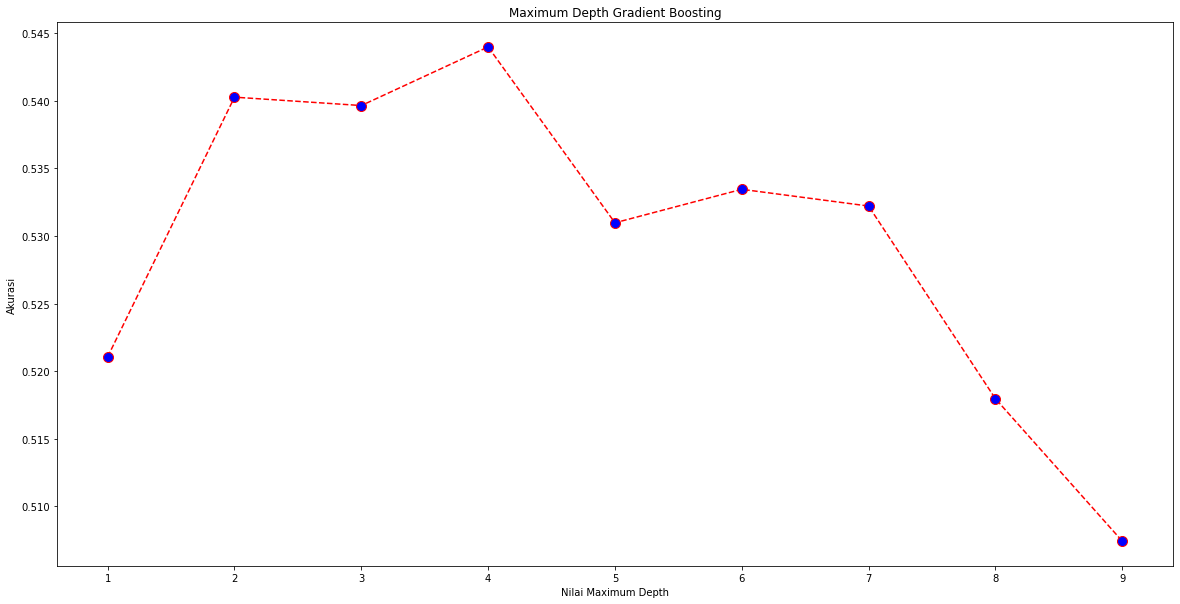

In [71]:
acc_maxdepth = []

# Calculating accuracy
for i in range(1,10):  
    model = GradientBoostingClassifier(random_state=10, max_depth=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_maxdepth.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(range(1, 10), acc_maxdepth, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Maximum Depth Gradient Boosting')  
plt.xlabel('Nilai Maximum Depth')  
plt.ylabel('Akurasi')
plt.show()

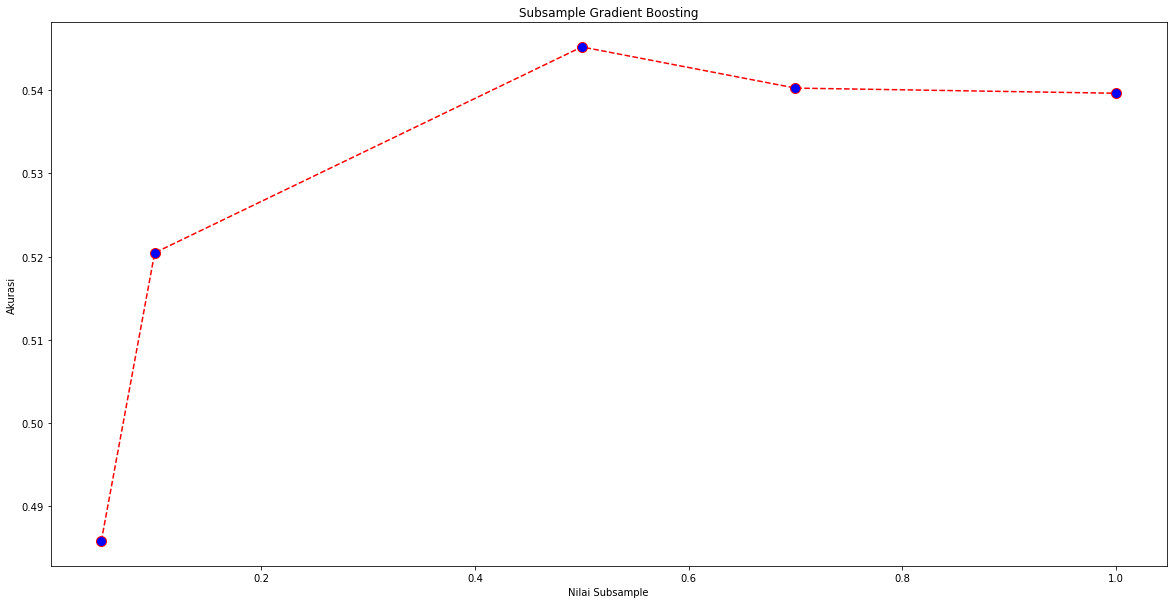

In [72]:
acc_subsample = []
subsample = [0.05, 0.1, 0.5, 0.7, 1.0]

# Calculating accuracy
for i in subsample:  
    model = GradientBoostingClassifier(random_state=10, subsample=i)
    model.fit(X_train, y_train)
 
    pred_i = model.predict(X_test)
    acc_subsample.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(20, 10))  
plt.plot(subsample, acc_subsample, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Subsample Gradient Boosting')  
plt.xlabel('Nilai Subsample')  
plt.ylabel('Akurasi')
plt.show()

### Feature Importance


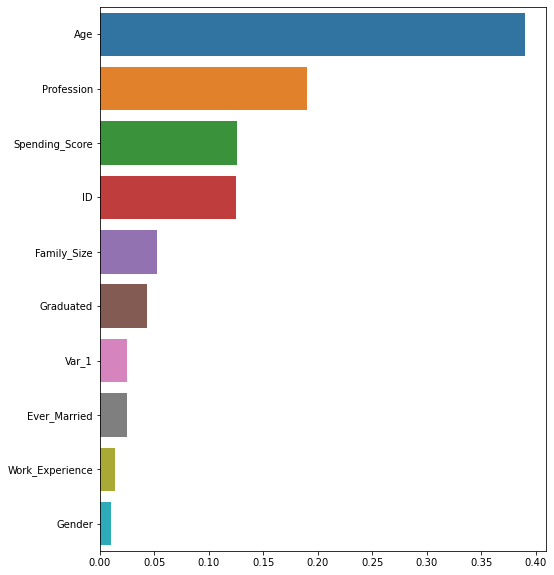

In [73]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharey=True)
ax = sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.show()

In [74]:
model = GradientBoostingClassifier(max_depth=2, n_estimators=20, random_state=10, subsample=0.7)
model.fit(X_train, y_train)
pred = model.predict(X_test)

## Confusion Matrix

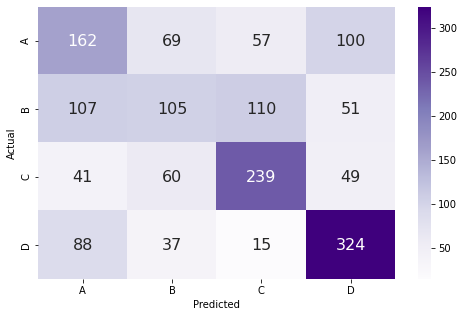

In [75]:

from sklearn.metrics import confusion_matrix

con = confusion_matrix(y_test, pred)

hm = pd.DataFrame(con, index = [i for i in 'ABCD'], columns = [i for i in 'ABCD'])
hm.index.name = 'Actual'
hm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(hm, annot=True, cmap='Purples', annot_kws={"size": 16}, fmt='d')
plt.show()

Only the D segment is relatively accurate. It also still has quite a lot of errors compared to segment A.